In [1]:
import sys
module_path = 'C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT'
sys.path.insert(1, module_path)
import Meta_SCMT
import numpy as np
import matplotlib.pyplot as plt

In [2]:
GP = {
    'dim' : 1, #dim : 1 or 2.
    'modes' : 1, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.28,
    'res' : 20, #resolution within one period
    'downsample_ratio': 1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lam' : 0.59,
    'n_sub' : 1.46, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.06, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.27,
    'dh' : 0.01, #the step size of h.
    'path' : "sim_cache_590nm/", #the inter state store path            
}
sim_590 = Meta_SCMT.Sim(**GP)

C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\simulator.py:72: UserWarning: Your global parameters have changed. be careful loading any cached data, it may be in consist!
  warnings.warn('Your global parameters have changed. be careful loading any cached data, it may be in consist!')


If dowmsample_ratio changed, if only need to rerun fitting E.
It is ok to change n_sub, which is decoupled with the cached data.


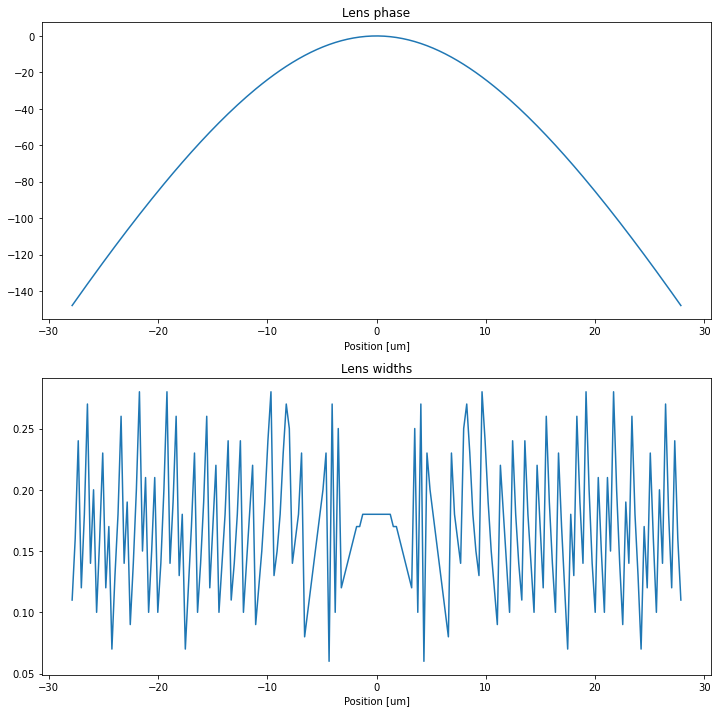

In [3]:
N = 200
theta = 0
NA = 0.8
prop_dis = 0.5 * N * GP['period'] * np.sqrt((1 - NA**2)/NA**2)
wgs = sim_590.PBA.design_lens(N, prop_dis, load = True)

In [4]:
GP = {
    'dim' : 1, #dim : 1 or 2.
    'modes' : 1, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.28,
    'res' : 20, #resolution within one period
    'downsample_ratio': 1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.6, #waveguide height
    'lams' : [0.66, 0.59, 0.532],
    'n_sub' : 1.46, #the refractive index of substrate.
    'n_wg' : 2.4,# the refractive index of waveguide
    'h_min' : 0.06, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.27,
    'dh' : 0.01, #the step size of h.
    'paths' : ["sim_cache_660nm/", "sim_cache_590nm/", "sim_cache_532nm/"], #the inter state store path            
}
sim = Meta_SCMT.SimLam(**GP)

In [5]:
N = 200
NA = 0.8
prop_dis = 0.5 * N * GP['period'] * np.sqrt((1 - NA**2)/NA**2)

In [17]:
sim.scmt.init_model(N, prop_dis, COUPLING = True, init_hs= None, far_field= True)

coo_sparse generated.
coo_sparse generated.
dis model input generated.
coo_sparse generated.
coo_sparse generated.
dis model input generated.
coo_sparse generated.
coo_sparse generated.
dis model input generated.
initialized by default h_paras.


In [18]:
sim.scmt.optimize(notes = 'Apr04_N' + str(N) + 'None_init_random0.1', lr = 0.1, steps = 2000, minmax = False)

  0%|                                                                                         | 0/2001 [00:00<?, ?it/s]

decay_rate: 0.79
the numerical aperture:  0.8000000000000002 target spot size for max[lams], (number of points): 29.464285714285705


100%|██████████████████████████████████████████████████████████████████████████████| 2001/2001 [03:06<00:00, 10.71it/s]

final lr: [0.009999999999999997]
parameters saved in. output_cmt/Apr04_N200None_init_random0.1/


# seems minmax with lr = 0.1 is the best option.

# 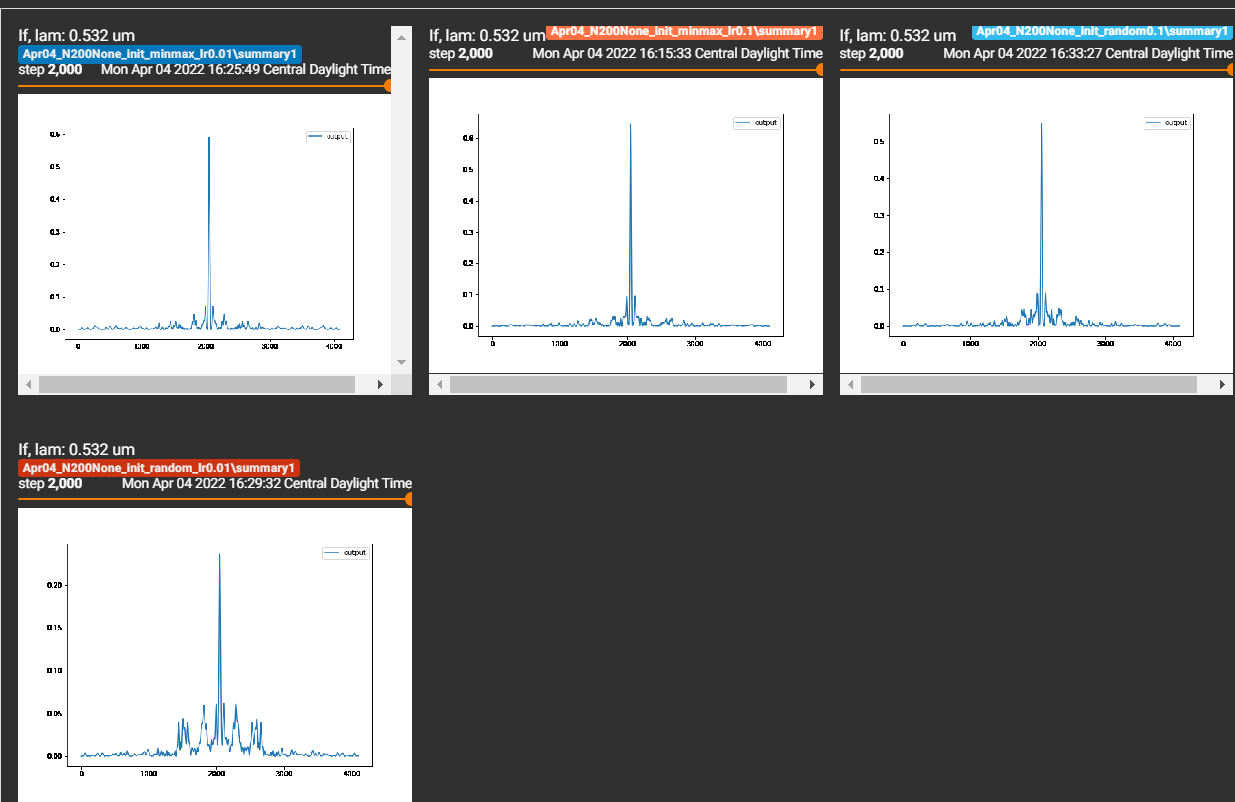